In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For APIs
import requests


In [2]:
# Simulate paper price index (monthly)
dates = pd.date_range(start='2022-01-01', periods=24, freq='M')
paper_price = np.random.normal(loc=1000, scale=50, size=24)
price_index = pd.DataFrame({'Date': dates, 'Paper_Price_Index': paper_price})

# Simulate economic indicators (e.g., inflation, demand index)
inflation = np.random.normal(3, 0.5, 24)
demand_index = np.random.normal(50, 10, 24)
economics = pd.DataFrame({
    'Date': dates,
    'Inflation_Rate': inflation,
    'Demand_Index': demand_index
})


<ipython-input-2-582055f27e48>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2022-01-01', periods=24, freq='M')


In [3]:
# Merge on Date
df_market = pd.merge(price_index, economics, on='Date')
df_market.set_index('Date', inplace=True)

print(df_market.head())


            Paper_Price_Index  Inflation_Rate  Demand_Index
Date                                                       
2022-01-31         925.953345        3.164740     59.203477
2022-02-28        1099.038230        1.938422     35.292510
2022-03-31        1060.568969        2.830333     62.072205
2022-04-30         956.255227        2.590749     56.879899
2022-05-31        1003.336910        3.471003     55.448591



Correlation Matrix:
                   Paper_Price_Index  Inflation_Rate  Demand_Index
Paper_Price_Index           1.000000        0.129181     -0.388592
Inflation_Rate              0.129181        1.000000     -0.147711
Demand_Index               -0.388592       -0.147711      1.000000


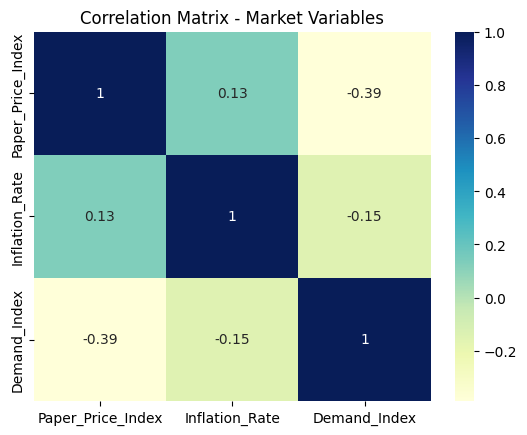

In [4]:
corr_matrix = df_market.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix - Market Variables")
plt.show()


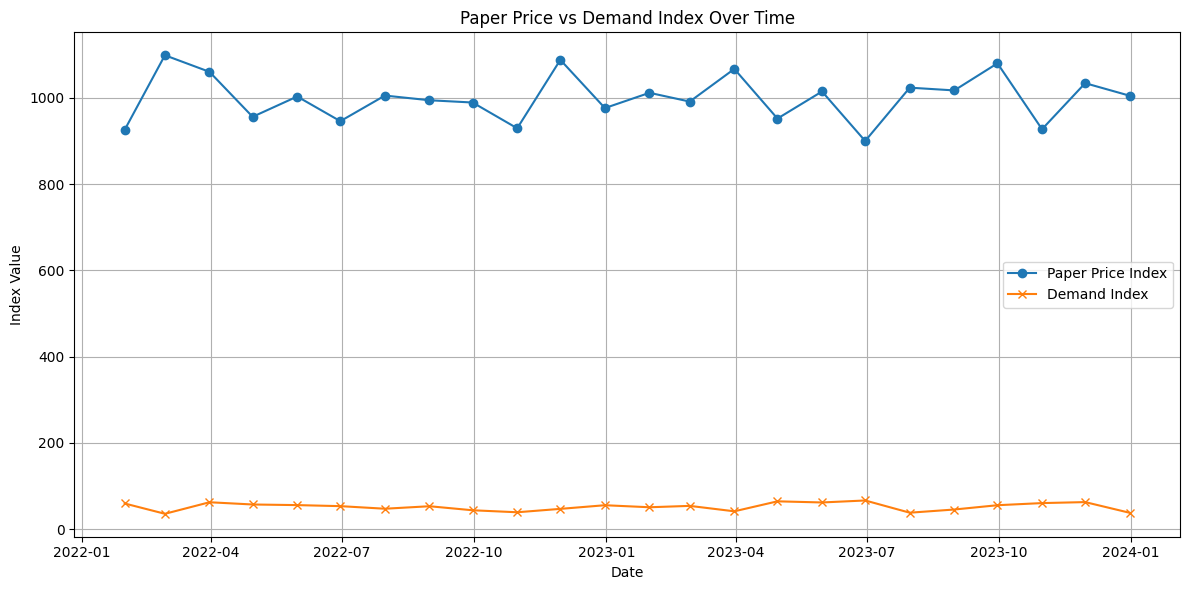

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df_market.index, df_market['Paper_Price_Index'], label='Paper Price Index', marker='o')
plt.plot(df_market.index, df_market['Demand_Index'], label='Demand Index', marker='x')
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("Paper Price vs Demand Index Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Simple rule-based insight
if corr_matrix.loc['Paper_Price_Index', 'Demand_Index'] > 0.5:
    print("✅ Strong positive correlation: Price rises with demand.")
else:
    print("⚠️ Weak or negative correlation: Investigate further.")


⚠️ Weak or negative correlation: Investigate further.
